## <font color = red>Graphs On Super Store Data</font>
#### <font color = Yellow>Sanket INT-11</font>


In [4]:
import numpy as np 
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
superstore = pd.read_excel("Superstore.xls")
df = superstore.copy

In [6]:
df = pd.DataFrame(superstore)
df.head(2)

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             9993 non-null   float64       
 1   order _id      9993 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
df.isna().sum()

no               1
order _id        1
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df_cleaned = df.dropna()

In [10]:
df_cleaned

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990.0,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [11]:
df.columns

Index(['no', 'order _id', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
import pandas as pd
import plotly.express as px

# Load the data
superstore = pd.read_excel("Superstore.xls")
df = superstore.copy()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample by month and sum the 'Profit' column
monthly_profit = df['Profit'].resample('M').sum().reset_index()
yearly_profit = df['Profit'].resample('Y').sum().reset_index()
quaterly_profit = df['Profit'].resample('Q').sum().reset_index()
# Create a line plot
fig = px.line(monthly_profit, x='Order Date', y='Profit', title='Monthly Profit')

# Show the plot
fig.show()

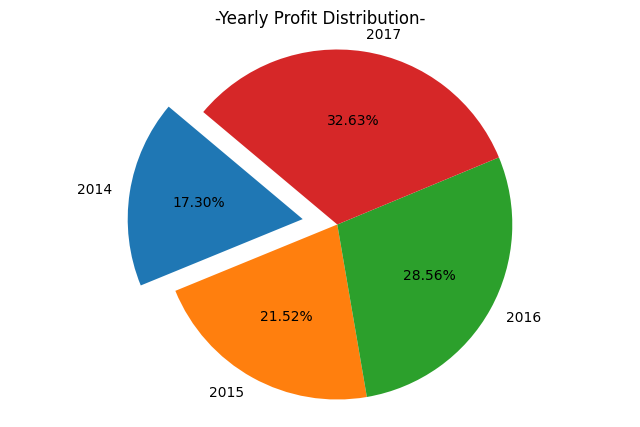

In [13]:
# Yearly Profit
plt.figure(figsize=(8,5))
plt.pie(yearly_profit['Profit'],labels= yearly_profit['Order Date'].dt.strftime("%Y"),
        autopct='%1.2f%%',
        explode = [0.2] + [0] * (len(yearly_profit)-1),
        startangle = 140
        )
plt.title('-Yearly Profit Distribution-')
plt.axis('equal')
plt.show()





In [14]:
quaterly_profit = df['Profit'].resample('Q').sum().reset_index()

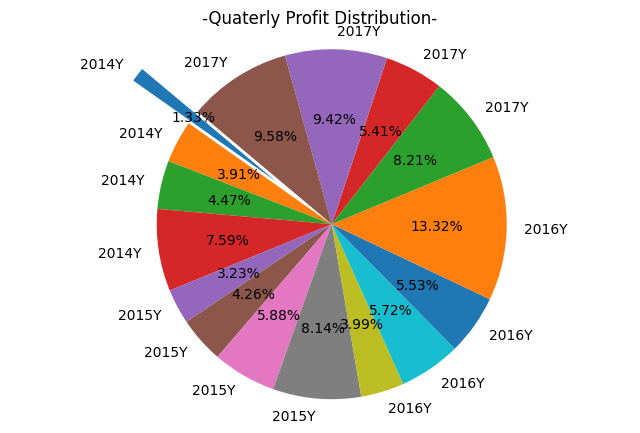

In [15]:
# Quaterly profit Profit
plt.figure(figsize=(8,5))
explode = ()
plt.pie(quaterly_profit['Profit'],labels= quaterly_profit   ['Order Date'].dt.strftime("%YY"),
        autopct='%1.2f%%',
        explode = [0.4] + [0] * (len(quaterly_profit)-1),
        startangle = 140
        )
plt.title('-Quaterly Profit Distribution-')
plt.axis('equal')
plt.show()




### User defined function with try and except and logger 

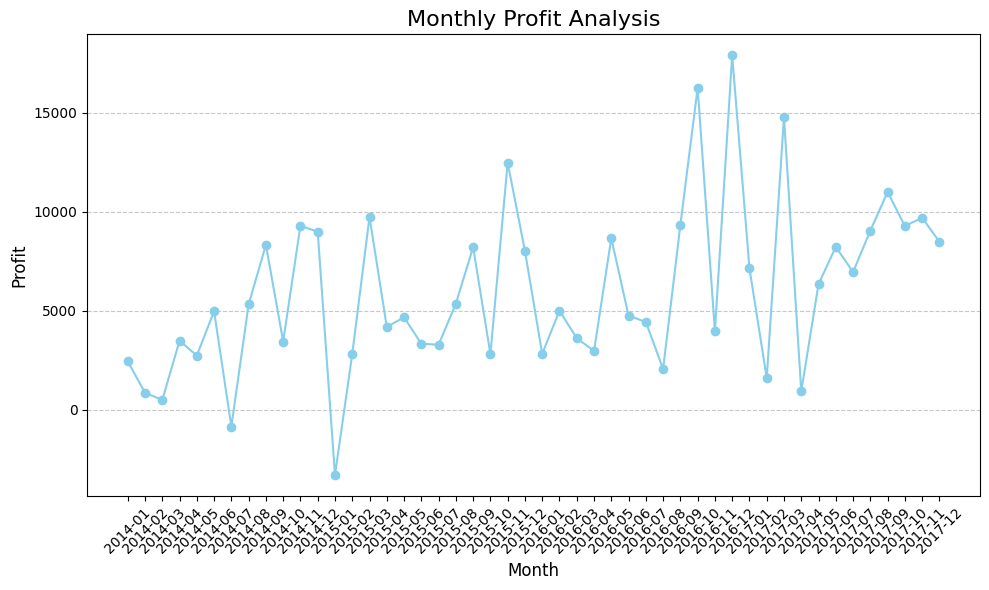

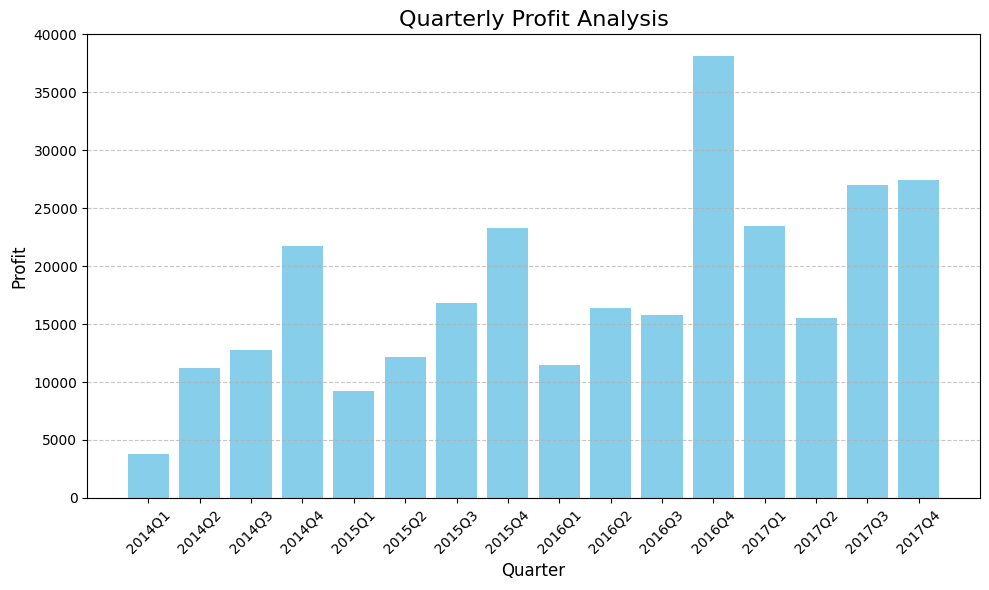

In [16]:

import pandas as pd
import logging
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(
    filename="superstore_analysis.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def load_data(file_path):

    try:
        logging.info("Loading data from file: %s", file_path)
        data = pd.read_excel(file_path)
        logging.info("Data loaded successfully. Shape: %s", data.shape)
        return data
    except Exception as e:
        logging.error("Error loading data: %s", e)
        raise

def clean_data(data):
    try:
        logging.info("Cleaning data...")
        initial_shape = data.shape
        data = data.drop_duplicates()
        data = data.dropna()
        logging.info("Data cleaned. Removed %d rows.", initial_shape[0] - data.shape[0])
        return data
    except Exception as e:
        logging.error("Error cleaning data: %s", e)
        raise

def analyze_yearly_profit(data):
    try:
        logging.info("Analyzing yearly ptofit...")
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['year'] = data['Order Date'].dt.to_period('Y')
        yearly_profit = data.groupby('Year')['Profit'].sum().reset_index()
        logging.info('Yearly profit analysis completed')
        return yearly_profit
    except Exception as e:
        logging.error('Error analyzing yearly profit: %s',e)
        raise

def analyze_quarterly_profit(data):
    try:
        logging.info("Analyzing quarterly profit...")
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['Quarter'] = data['Order Date'].dt.to_period('Q')
        quarterly_profit = data.groupby('Quarter')['Profit'].sum().reset_index()
        logging.info("Quarterly profit analysis completed.")
        return quarterly_profit
    except Exception as e:
        logging.error("Error analyzing quarterly profit: %s", e)
        raise

def analyze_monthly_profit(data):
    try:
        logging.info("Analyzing monthly profit...")
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['Month'] = data['Order Date'].dt.to_period('M')
        monthly_profit = data.groupby('Month')['Profit'].sum().reset_index()
        logging.info('Monthly profit analysis completed.')
        return monthly_profit
    except Exception as e:
        logging.error("Error analyzin monthly profit: %s",e)
        raise


def visualize_monthly_profit(monthly_profit):
    """Visualize the monthly  profit as a line chart."""
    try:
        logging.info("Visualizing monthly profit...")
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_profit['Month'].astype(str), monthly_profit['Profit'], marker='o', linestyle='-', color='skyblue')
        plt.title("Monthly Profit Analysis", fontsize=16)
        plt.xlabel("Month", fontsize=12)
        plt.ylabel("Profit", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        logging.info("Monthly profit visualization completed.")
    except Exception as e:
        logging.error("Error visualizing monthly profit: %s", e)
        raise


def visualize_quarterly_profit(quarterly_profit):
    """Visualize the quarterly profit as a bar chart."""
    try:
        logging.info("Visualizing quarterly profit...")
        plt.figure(figsize=(10, 6))
        plt.bar(quarterly_profit['Quarter'].astype(str), quarterly_profit['Profit'], color='skyblue')
        plt.title("Quarterly Profit Analysis", fontsize=16)
        plt.xlabel("Quarter", fontsize=12)
        plt.ylabel("Profit", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        logging.info("Quarterly profit visualization completed.")
    except Exception as e:
        logging.error("Error visualizing quarterly profit: %s", e)
        raise 

# def visualize_yearly_profit(yearly_profit):
#     try:
#         logging.info("Visualizing yearly profit...")
#         if len(yearly_profit) < 2:
#             logging.info("Not enough data to create pie chart.")
#             return
#         plt.figure(figsize=(8,5))
#         plt.pie(yearly_profit['Profit'],labels= yearly_profit['year'].dt.strftime("%Y"),
#                 autopct='%1.2f%%',
#                 explode = [0.2] + [0] * (len(yearly_profit)-1),
#                 startangle = 140
#                 )       
#         plt.title('-Yearly Profit Distribution-')
#         plt.axis('equal')
#         plt.show()
#         logging.info("Yearly profit visualization completed.")
#     except Exception as e:
#         logging.error("Error visualizing yearly profit: %s", e)
#         raise


# # Main Pipeline
def superstore_analysis_pipeline(file_path):
    try:
  
        data = load_data(file_path)

        #:Clean the data
        cleaned_data = clean_data(data)
        
        #  Analyze yearly profit
        # yearly_profit =  analyze_yearly_profit(cleaned_data)

        #  Analyze quarterly profit
        monthly_profit = analyze_monthly_profit(cleaned_data)  

        #  Analyze quarterly profit
        quarterly_profit = analyze_quarterly_profit(cleaned_data)

        #  Visualize results

        # visualize_yearly_profit(yearly_profit)
        visualize_monthly_profit(monthly_profit)
        visualize_quarterly_profit(quarterly_profit)

        logging.info("Superstore data analysis pipeline completed successfully.")
    except Exception as e:
        logging.error("Pipeline failed: %s", e)
file_path = 'Superstore.xls'
superstore_analysis_pipeline(file_path)


In [17]:
def find_record_for_jun_2014(data):
    try:
        logging.info("Finding record for Jun 2014...")
        filtered_data = data[data['Order Date'].dt.strftime('%Y-%m') == '2014-06-01']
        logging.info("Record for Jun 2014 found.")
        return filtered_data
    except Exception as e:
        logging.error("Error finding record for Jun 2014: %s", e)
        raise  
data = "superstore.xls" 
df = pd.read_excel(data)
filtered_data = find_record_for_jun_2014(df)
filtered_data

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [18]:
import plotly.express as px
import logging
import pandas as pd

logging.basicConfig(level=logging.INFO)

def visualize_june_month_record(filtered_data):
    """Visualize the record for June 2014 with help scatter plot using plotly."""
    try:
        logging.info("Visualizing record for June 2014...")
        # Convert 'Order Date' column to datetime type
        filtered_data['Order Date'] = pd.to_datetime(filtered_data['Order Date'])
        fig = px.scatter(filtered_data, x='Order Date', y='Profit', title='Record for June 2014')
        fig.show()
        logging.info("Record for June 2014 visualization completed.")
    except Exception as e:
        logging.error("Error visualizing record for June 2014: %s", e)
        raise



In [19]:
df.columns

Index(['no', 'order _id', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_excel('Superstore.xls')

# Convert 'Order Date' column to datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter the data for June 2014
june_2014_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2014)]

# Create a scatter plot using Plotly
fig = px.scatter(june_2014_data, x='Sales', y='Profit', title='Sales vs Profit for June 2014')

# Show the plot
fig.show()

In [21]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_excel('Superstore.xls')

# Convert 'Order Date' column to datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter the data for June 2014
june_2014_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2014)]

try:
    # Create a scatter plot with trend line
    fig_scatter = px.scatter(june_2014_data, x='Sales', y='Profit', trendline='ols', title='Sales vs Profit for June 2014')
    fig_scatter.show()
except Exception as e:
    print(f"Error creating scatter plot: {e}")

try:
    # Create a line plot with rolling average
    june_2014_data['Rolling Average'] = june_2014_data['Sales'].rolling(window=7).mean()
    fig_line = px.line(june_2014_data, x='Order Date', y=['Sales', 'Rolling Average'], title='Sales over Time for June 2014')
    fig_line.show()
except Exception as e:
    print(f"Error creating line plot: {e}")

try:
    # Create a bar plot with top 5 categories
    top_categories = june_2014_data['Category'].value_counts().head(5).index
    top_categories_data = june_2014_data[june_2014_data['Category'].isin(top_categories)]
    fig_bar = px.bar(top_categories_data, x='Category', y='Sales', title='Top 5 Categories by Sales for June 2014')
    fig_bar.show()
except Exception as e:
    print(f"Error creating bar plot: {e}")

try:
    # Create a pie chart with sales by region
    fig_pie = px.pie(june_2014_data, names='Region', values='Sales', title='Sales by Region for June 2014')
    fig_pie.show()
except Exception as e:
    print(f"Error creating pie chart: {e}")

C:\Users\sanke\AppData\Local\Temp\ipykernel_23708\2680795863.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_excel('Superstore.xls')

# Convert 'Order Date' column to datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter the data for June 2014
june_2014_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2014)]

try:
    # Create a scatter plot with trend line
    fig_scatter = px.scatter(june_2014_data, x='Sales', y='Profit', trendline='ols', title='Sales vs Profit for June 2014')
    fig_scatter.show()
except Exception as e:
    print(f"Error creating scatter plot: {e}")

try:
    # Create a bar plot with top 5 categories
    top_categories = june_2014_data['Category'].value_counts().head(5).index
    top_categories_data = june_2014_data[june_2014_data['Category'].isin(top_categories)]
    fig_bar = px.bar(top_categories_data, x='Category', y='Sales', title='Top 5 Categories by Sales for June 2014')
    fig_bar.show()
except Exception as e:
    print(f"Error creating bar plot: {e}")

try:
    # Create a bar plot with sales by region
    fig_bar_region = px.bar(june_2014_data, x='Region', y='Sales', title='Sales by Region for June 2014')
    fig_bar_region.show()
except Exception as e:
    print(f"Error creating bar plot by region: {e}")

try:
    # Create a bar plot with sales by sub-category
    fig_bar_subcategory = px.bar(june_2014_data, x='Sub-Category', y='Sales', title='Sales by Sub-Category for June 2014')
    fig_bar_subcategory.show()
except Exception as e:
    print(f"Error creating bar plot by sub-category: {e}")

In [23]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# Load the data
data = pd.read_excel('Superstore.xls')

# Convert 'Order Date' column to datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter the data for June 2014, 2015, 2016, and 2017
june_2014_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2014)]
june_2015_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2015)]
june_2016_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2016)]
june_2017_data = data[(data['Order Date'].dt.month == 6) & (data['Order Date'].dt.year == 2017)]

try:
    # Create a scatter plot with trend line for June 2014
    fig_scatter_2014 = px.scatter(june_2014_data, x='Sales', y='Profit', trendline='ols', title='Sales vs Profit for June 2014')
    fig_scatter_2014.show()
except Exception as e:
    print(f"Error creating scatter plot for June 2014: {e}")

try:
    # Create a scatter plot with trend line for June 2015
    fig_scatter_2015 = px.scatter(june_2015_data, x='Sales', y='Profit', trendline='ols', title='Sales vs Profit for June 2015')
    fig_scatter_2015.show()
except Exception as e:
    print(f"Error creating scatter plot for June 2015: {e}")

try:
    # Create a scatter plot with trend line for June 2016
    fig_scatter_2016 = px.scatter(june_2016_data, x='Sales', y='Profit', trendline='ols', title='Sales vs Profit for June 2016')
    fig_scatter_2016.show()
except Exception as e:
    print(f"Error creating scatter plot for June 2016: {e}")

try:
    # Create a scatter plot with trend line for June 2017
    fig_scatter_2017 = px.scatter(june_2017_data, x='Sales', y='Profit', trendline='ols', title='Sales vs Profit for June 2017')
    fig_scatter_2017.show()
except Exception as e:
    print(f"Error creating scatter plot for June 2017: {e}")

try:
    # Create a subplot with bar plots for June 2014, 2015, 2016, and 2017
    fig = make_subplots(rows=4, cols=1, subplot_titles=['Top 5 Categories by Sales for June 2014', 
                                                        'Top 5 Categories by Sales for June 2015', 
                                                        'Top 5 Categories by Sales for June 2016', 
                                                        'Top 5 Categories by Sales for June 2017'])
    top_categories_2014 = june_2014_data['Category'].value_counts().head(5).index
    top_categories_data_2014 = june_2014_data[june_2014_data['Category'].isin(top_categories_2014)]
    fig.add_trace(px.bar(top_categories_data_2014, x='Category', y='Sales').data[0], row=1, col=1)
    top_categories_2015 = june_2015_data['Category'].value_counts().head(5).index
    top_categories_data_2015 = june_2015_data[june_2015_data['Category'].isin(top_categories_2015)]
    fig.add_trace(px.bar(top_categories_data_2015, x='Category', y='Sales').data[0], row=2, col=1)
    top_categories_2016 = june_2016_data['Category'].value_counts().head(5).index
    top_categories_data_2016 = june_2016_data[june_2016_data['Category'].isin(top_categories_2016)]
    fig.add_trace(px.bar(top_categories_data_2016, x='Category', y='Sales').data[0], row=3, col=1)
    top_categories_2017 = june_2017_data['Category'].value_counts().head(5).index
    top_categories_data_2017 = june_2017_data[june_2017_data['Category'].isin(top_categories_2017)]
    fig.add_trace(px.bar(top_categories_data_2017, x='Category', y='Sales').data[0], row=4, col=1)
    fig.show()
except Exception as e:
    print(f"Error creating subplot: {e}")
    

In [24]:

# Load the data
data = pd.read_excel('Superstore.xls')

# Convert 'Order Date' column to datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Create a pair plot
pair_plot = px.scatter_matrix(data[['Sales', 'Profit', 'Quantity', 'Discount']], 
                              color='Profit', 
                              color_discrete_sequence=['red', 'green', 'blue', 'yellow', 'purple'])
pair_plot.update_layout(title='Pair Plot of Sales, Profit, Quantity, and Discount')
pair_plot.show()

pair_plot = px.scatter_matrix(data[['Sales', 'Profit', 'Quantity', 'Discount']], 
                              color='Discount', 
                              color_discrete_sequence=['red', 'green', 'blue', 'yellow', 'purple'])
pair_plot.update_layout(title='Pair Plot of Sales, Profit, Quantity, and Discount')
pair_plot.show()



In [33]:
df.columns

Index(['no', 'order _id', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [36]:
df['State']

0         Kentucky
1         Kentucky
2       California
3          Florida
4          Florida
           ...    
9989       Florida
9990    California
9991    California
9992    California
9993    California
Name: State, Length: 9994, dtype: object

In [37]:
import plotly.express as px

# Group the data by 'State' and calculate the sum of 'Sales'
state_sales = data.groupby('State')['Sales'].sum().reset_index()

# Create a bar chart to show the state-wise sum of sales
fig = px.bar(state_sales, x='State', y='Sales')
fig.update_layout(title='State-wise Sum of Sales')
fig.show()

In [41]:
import plotly.express as px

import plotly.express as px

# Group the data by 'State' and calculate the sum of 'Sales'
state_sales = data.groupby('State')['Sales'].sum().reset_index()

# Create a map to show the state-wise sales
fig = px.choropleth(state_sales, locations='State', color='Sales', locationmode='USA-states')
fig.update_layout(title='State-wise Sales')
fig.show()

In [40]:
df['Sales'].dtype

dtype('float64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             9993 non-null   float64       
 1   order _id      9993 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [55]:


# # Group the data by 'State' and calculate the sum of 'Sales'
# state_sales = data.groupby('State')['Sales'].sum().reset_index()

# # Create a map to show the state-wise sales with markers
# fig = px.scatter_mapbox(state_sales, lat='Latitude', lon='Longitude', hover_name='State', hover_data=['Sales'])
# fig.update_layout(title='State-wise Sales with Markers', mapbox=dict(accesstoken=mapbox_access_token, bearing=0, 
#                                                                   center=dict(lat=37.8, lon=-96), zoom=4))
# fig.show()

In [42]:
import pandas as pd
import plotly.express as px

# Create a dictionary that maps state names to latitude and longitude values
state_lat_lon = {
    'Alabama': (32.361538, -86.279119),
    'Alaska': (61.3850, -152.2683),
    'Arizona': (33.448457, -112.073856),
    'Arkansas': (34.7465, -92.2896),
    'California': (36.7783, -119.4179),
    'Colorado': (39.7392, -104.9903),
    'Connecticut': (41.7673, -72.6779),
    'Delaware': (39.1617, -75.5267),
    'Florida': (27.6648, -81.5158),
    'Georgia': (33.7489, -84.3879),
    'Hawaii': (21.3047, -157.8578),
    'Idaho': (43.6150, -116.2067),
    'Illinois': (40.6331, -89.3985),
    'Indiana': (39.7683, -86.1581),
    'Iowa': (41.8780, -93.0977),
    'Kansas': (39.0503, -95.6698),
    'Kentucky': (38.0406, -84.8631),
    'Louisiana': (30.4583, -91.1403),
    'Maine': (44.3236, -69.7653),
    'Maryland': (39.0639, -76.8021),
    'Massachusetts': (42.4072, -71.3827),
    'Michigan': (42.7333, -84.5555),
    'Minnesota': (44.9778, -93.2650),
    'Mississippi': (32.3200, -90.2073),
    'Missouri': (38.5753, -92.2884),
    'Montana': (46.9217, -110.4544),
    'Nebraska': (40.8097, -96.6753),
    'Nevada': (39.1607, -119.7479),
    'New Hampshire': (43.6597, -71.5693),
    'New Jersey': (40.2217, -74.7564),
    'New Mexico': (35.0853, -106.6474),
    'New York': (42.6596, -75.4724),
    'North Carolina': (35.7596, -78.6382),
    'North Dakota': (46.8083, -100.7793),
    'Ohio': (40.3736, -82.9071),
    'Oklahoma': (35.4676, -97.5164),
    'Oregon': (44.5722, -122.0703),
    'Pennsylvania': (40.8683, -77.7981),
    'Rhode Island': (41.8236, -71.4128),
    'South Carolina': (33.8361, -81.1637),
    'South Dakota': (44.3672, -100.3363),
    'Tennessee': (35.5175, -86.5804),
    'Texas': (31.9686, -99.9018),
    'Utah': (40.7608, -111.8903),
    'Vermont': (44.2667, -72.5714),
    'Virginia': (37.7749, -78.2437),
    'Washington': (47.7511, -120.4473),
    'West Virginia': (38.6401, -80.4543),
    'Wisconsin': (43.0747, -89.3842),
    'Wyoming': (41.1406, -104.8203)
}

# Create a new DataFrame with the state names and their corresponding latitude and longitude values
state_df = pd.DataFrame(list(state_lat_lon.items()), columns=['State', 'Lat_Lon'],)

# Split the Lat_Lon column into separate latitude and longitude columns
state_df[['Latitude', 'Longitude']] = state_df['Lat_Lon'].apply(pd.Series)

# Drop the Lat_Lon column
state_df = state_df.drop('Lat_Lon', axis=1)



# Create a map

In [45]:
data = df
state_df # adding lotitude and longitude
DataFramedf = pd.merge(df, state_df, on='State')
DataFramedf


,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Latitude,Longitude
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,38.0406,-84.8631
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,38.0406,-84.8631
2,419.0,CA-2017-154816,2017-11-06,2017-11-10,Standard Class,VB-21745,Victoria Brennan,Corporate,United States,Richmond,...,OFF-PA-10003845,Office Supplies,Paper,Xerox 1987,5.780,1,0.0,2.8322,38.0406,-84.8631
3,539.0,CA-2015-134894,2015-12-07,2015-12-11,Standard Class,DK-12985,Darren Koutras,Consumer,United States,Henderson,...,OFF-AP-10001271,Office Supplies,Appliances,Eureka The Boss Cordless Rechargeable Stick Vac,152.940,3,0.0,41.2938,38.0406,-84.8631
4,540.0,CA-2015-134894,2015-12-07,2015-12-11,Standard Class,DK-12985,Darren Koutras,Consumer,United States,Henderson,...,FUR-CH-10002647,Furniture,Chairs,"Situations Contoured Folding Chairs, 4/Set",283.920,4,0.0,70.9800,38.0406,-84.8631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,5870.0,CA-2016-152247,2016-11-07,2016-11-12,Standard Class,MA-17995,Michelle Arnett,Home Office,United States,Cheyenne,...,FUR-CH-10001215,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,1603.136,4,0.2,100.1960,41.1406,-104.8203
9980,7895.0,CA-2017-124744,2017-06-21,2017-06-25,Standard Class,EH-14125,Eugene Hildebrand,Home Office,United States,Wheeling,...,OFF-BI-10002852,Office Supplies,Binders,Ibico Standard Transparent Covers,82.400,5,0.0,40.3760,38.6401,-80.4543
9981,7896.0,CA-2017-124744,2017-06-21,2017-06-25,Standard Class,EH-14125,Eugene Hildebrand,Home Office,United States,Wheeling,...,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,6.240,2,0.0,3.0576,38.6401,-80.4543
9982,7897.0,CA-2017-124744,2017-06-21,2017-06-25,Standard Class,EH-14125,Eugene Hildebrand,Home Office,United States,Wheeling,...,OFF-PA-10001970,Office Supplies,Paper,Xerox 1908,447.840,8,0.0,219.4416,38.6401,-80.4543


None

In [46]:
import plotly.express as px

# Group the data by 'State' and calculate the sum of 'Sales'
state_sales = DataFramedf.groupby('State')['Sales'].sum().reset_index()

# Merge the state_sales with the state_df to get the latitude and longitude values
state_sales = pd.merge(state_sales, state_df, on='State')

# Create a map
fig = px.scatter_mapbox(state_sales, lat='Latitude', lon='Longitude', hover_name='State', hover_data=['Sales'],
                        zoom=4, height=600, width=800)
fig.update_layout(title='Sales by State', mapbox_style='open-street-map')
fig.show()

In [52]:
# import plotly.express as px
# import matplotlib.pyplot as plt


# # Group the data by 'State' and calculate the sum of 'Sales'
# state_sales = DataFramedf.groupby('State')['Sales'].sum().reset_index()

# # Merge the state_sales with the state_df to get the latitude and longitude values
# state_sales = pd.merge(state_sales, DataFramedf, on='State')

# # Create a dictionary that maps states to numbers
# state_numbers = {
#     'Alabama': 1,
#     'Alaska': 2,
#     'Arizona': 3,
#     'Arkansas': 4,
#     'California': 5,
#     'Colorado': 6,
#     'Connecticut': 7,
#     'Delaware': 8,
#     'Florida': 9,
#     'Georgia': 10,
#     'Hawaii': 11,
#     'Idaho': 12,
#     'Illinois': 13,
#     'Indiana': 14,
#     'Iowa': 15,
#     'Kansas': 16,
#     'Kentucky': 17,
#     'Louisiana': 18,
#     'Maine': 19,
#     'Maryland': 20,
#     'Massachusetts': 21,
#     'Michigan': 22,
#     'Minnesota': 23,
#     'Mississippi': 24,
#     'Missouri': 25,
#     'Montana': 26,
#     'Nebraska': 27,
#     'Nevada': 28,
#     'New Hampshire': 29,
#     'New Jersey': 30,
#     'New Mexico': 31,
#     'New York': 32,
#     'North Carolina': 33,
#     'North Dakota': 34,
#     'Ohio': 35,
#     'Oklahoma': 36,
#     'Oregon': 37,
#     'Pennsylvania': 38,
#     'Rhode Island': 39,
#     'South Carolina': 40,
#     'South Dakota': 41,
#     'Tennessee': 42,
#     'Texas': 43,
#     'Utah': 44,
#     'Vermont': 45,
#     'Virginia': 46,
#     'Washington': 47,
#     'West Virginia': 48,
#     'Wisconsin': 49,
#     'Wyoming': 50
# }

# # Create a map
# fig = px.scatter_mapbox(state_sales, lat='Latitude', lon='Longitude', hover_name='Sales', hover_data=['State'],
#                         zoom=4, height=600, width=800)

# # Create a search function
# def search_states(search_value):
#     if search_value.isdigit():
#         state_name = [k for k, v in state_numbers.items() if v == int(search_value)][0]
#         filtered_data = state_sales[state_sales['State'] == state_name]
#     else:
#         filtered_data = state_sales[state_sales['State'].str.contains(search_value, case=False)]
#     if filtered_data.empty:
#         print("No states found matching the search value.")
#     else:
#         fig = px.scatter_mapbox(filtered_data, lat='Latitude', lon='Longitude', hover_name='State', hover_data=['Sales'],
#                                 zoom=4, height=600, width=800)
#         fig.show()

# # Create a loop to continuously prompt the user for search values
# while True:
#     search_value = input("Enter a state name or number to search for (or 'quit' to exit): ")
#     if search_value.lower() == 'quit':
#         break
#     search_states(search_value)
